In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options


In [2]:
# Time period 1st Jan - 30th April (arbitrary )

# API credentials
# Email address 705762800217-compute@developer.gserviceaccount.com
# Key IDs 948ee8e2a420ef14a5d5a29bd35104fe2f1e6ed4
 

In [3]:
# open file. It is requested via API explorer using request parameters:

#Account: Skein.co
#Property: Skein.co
#View: Skein.co - Report
#ids: ga:93735856
#start-date: 2017-02-01
#end-date: 2017-04-30

#metrics
#ga:sessions
#ga:goalCompletionsAll


#dimensions
#ga:pagePath

#filter
#ga:sessions>30

In [4]:
input_flow= pd.read_csv('skein_data/SKEIN_user-flow.csv')

# rename columns
input_flow.columns=['Page','Sessions','Conversions']

# filter page with CR > 0
input_flow = input_flow[input_flow.Conversions > 0]

# group by page
input_flow_index = input_flow.set_index('Page')
input_flow

,Page,Sessions,Conversions
0,'/,1415,258
1,'/2017-data-technology-trends/,43,7
2,'/careers/,317,105
3,'/case-studies/,110,76
4,'/case-studies/toothscan-dental-app/,33,6
5,'/google-liar-ru-spam-in-analytics/,40,32
6,'/incubator-rus/,36,5
7,'/news/google-g/,33,31
8,'/what_we_do_lean_innovation/,34,55


In [5]:
input_flow['CR'] = input_flow.Conversions / input_flow.Sessions * 100
input_flow

,Page,Sessions,Conversions,CR
0,'/,1415,258,18.233216
1,'/2017-data-technology-trends/,43,7,16.279070
2,'/careers/,317,105,33.123028
3,'/case-studies/,110,76,69.090909
4,'/case-studies/toothscan-dental-app/,33,6,18.181818
5,'/google-liar-ru-spam-in-analytics/,40,32,80.000000
6,'/incubator-rus/,36,5,13.888889
7,'/news/google-g/,33,31,93.939394
8,'/what_we_do_lean_innovation/,34,55,161.764706


In [6]:
d= input_flow.drop('Sessions', 1)
d

,Page,Conversions,CR
0,'/,258,18.233216
1,'/2017-data-technology-trends/,7,16.279070
2,'/careers/,105,33.123028
3,'/case-studies/,76,69.090909
4,'/case-studies/toothscan-dental-app/,6,18.181818
5,'/google-liar-ru-spam-in-analytics/,32,80.000000
6,'/incubator-rus/,5,13.888889
7,'/news/google-g/,31,93.939394
8,'/what_we_do_lean_innovation/,55,161.764706


In [7]:
input_flow_cr = input_flow.set_index('CR')

max_CR = max(input_flow.CR)
best_page = input_flow_cr.loc[max_CR,'Page']
best_page

"'/what_we_do_lean_innovation/"

In [8]:
from bokeh.io import output_notebook
from bokeh.charts import Bar, Line, show
from bokeh.plotting import figure, output_file, show

output_notebook()
p = Bar(input_flow, 'Page', values='CR', title="The best converting page on your site is %s" % best_page)
p.legend.location = "top_right"
show(p)
print("Put an additional button \"Contact Us\" on the main page. (or adding the contact form link to the menu bar at the top of the homepage")

Loading BokehJS ...

Put an additional button "Contact Us" on the main page. (or adding the contact form link to the menu bar at the top of the homepage


In [9]:
df=pd.DataFrame(d)
total_rows=len(df.axes[0])
print(total_rows)

9


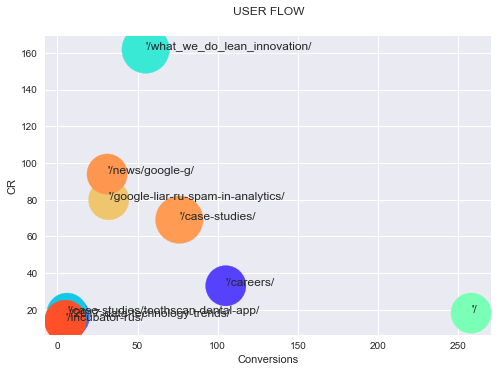

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

page=d['Page']
conversions = d['Conversions']
cr = d['CR']
injuries = [1625,1752,1629,2255,1630]

colors=cm.rainbow(np.random.rand(total_rows))

plt.scatter(conversions,cr,s=injuries,color=colors)
for i in range(total_rows):
    plt.annotate(page[i],xy=(conversions[i],cr[i]))
plt.xlabel('Conversions')
plt.ylabel('CR')

# Move title up with the "y" option
plt.title('USER FLOW',y=1.05)
plt.show()